# Fuzzy Logic in Data Mining #

## Membership functions based on expert assessments

In [1]:
def defatted(x):
    if x <= 12.5:
        return (-0.8*(x - 2.5) + 10)/10
    elif x <= 17.5:
        return (-0.2*(x - 12.5) + 1)/5
    else:
        return 0
def fat_medium(x):
    if x <= 12.5:
        return (0.8*(x - 2.5) + 2)/10
    elif x <= 17.5:
        return (-0.2*(x - 12.5) + 5)/5
    elif x <= 22.5:
        return (-0.8*(x-17.5) + 4)/5
    else:
        return 0
def fatty(x):
    if x <= 7.5:
        return 0
    elif x <= 12.5:
        return (0.2*(x - 7.5))/5
    elif x <= 17.5:
        return (0.6*(x - 12.5) + 1)/5
    elif x <= 22.5:
        return (0.2*(x - 17.5) + 4)/5
    else:
        return 1

C:\WPy-3670\python-3.6.7\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


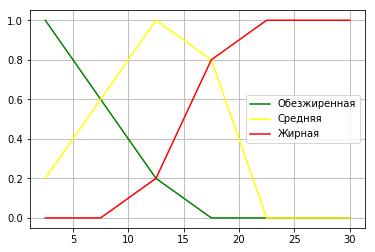

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
fig1, bx = plt.subplots()
x = [i*0.1 for i in range(25,301)]
bx.plot(x,[defatted(i) for i in x], label = "Обезжиренная", color = "green")
bx.plot(x,[fat_medium(i) for i in x], label = "Средняя", color = "yellow")
bx.plot(x,[fatty(i) for i in x], label = "Жирная", color = "red")
bx.grid()
bx.legend()
fig1.show()

In [3]:
def or_p(x,y):
    return [(x[i]+y[i]-x[i]*y[i]) for i in range(len(x))]
def and_p(x,y):
    return [(x[i]*y[i]) for i in range(len(x))]
def and_mm(x,y):
    return [min(x[i],y[i]) for i in range(len(x))]
def or_mm(x,y):
    return [max(x[i],y[i]) for i in range(len(x))]
def norm(y):
    mmax = max(y)
    return [(i/mmax) for i in y]

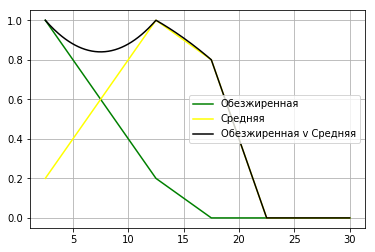

In [4]:
%matplotlib inline
fig1, bx = plt.subplots()
defat = [defatted(i) for i in x]
fat_med = [fat_medium(i) for i in x]
fat = [fatty(i) for i in x]
bx.plot(x,defat, label = "Обезжиренная", color = "green")
bx.plot(x,fat_med, label = "Средняя", color = "yellow")
bx.plot(x, or_p(defat, fat_med), label = "Обезжиренная v Средняя", color = "black")
bx.grid()
bx.legend()
fig1.show()

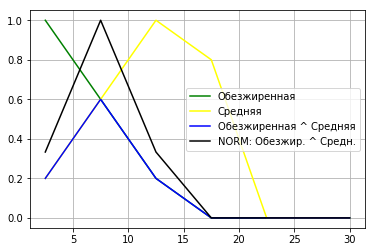

In [5]:
%matplotlib inline
fig1, bx = plt.subplots()
bx.plot(x,defat, label = "Обезжиренная", color = "green")
bx.plot(x,fat_med, label = "Средняя", color = "yellow")
bx.plot(x, and_mm(defat, fat_med), label = "Обезжиренная ^ Средняя", color = "blue")
bx.plot(x, norm(and_mm(defat, fat_med)), label = "NORM: Обезжир. ^ Средн.", color = "black")
bx.grid()
bx.legend()
fig1.show()

In [6]:
def not_(y):
    return [(1-i) for i in y]
def very_(y):
    return [(i**2) for i in y]
def maybe_(y):
    return [(i**0.5) for i in y]

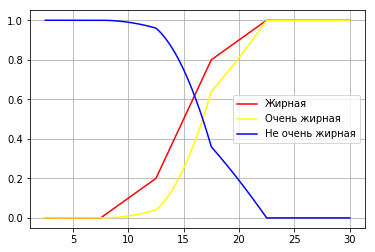

In [7]:
%matplotlib inline
fig1, bx = plt.subplots()
bx.plot(x,fat, label = "Жирная", color = "red")
bx.plot(x,very_(fat), label = "Очень жирная", color = "yellow")
bx.plot(x, not_(very_(fat)), label = "Не очень жирная", color = "blue")
bx.grid()
bx.legend()
fig1.show()

## The fuzzy inference system Mamdani-Zadeh

In [8]:
def bad_q(x):
    if x <= 0.25:
        return 1
    elif x <= 0.5:
        return 1 - (x - 0.25)
    elif x <= 0.75:
        return (-0.5*(x-0.5)+0.75*0.25)/0.25
    else:
        return 0
def good_q(x):
    if x <= 0.25:
        return 0
    elif x <= 0.5:
        return (0.75*(x - 0.25))/0.25
    elif x <= 0.75:
        return x + 0.25
    else:
        return 1

In [9]:
def low(x):
    if x <= 1250:
        return 1
    elif x <= 2500:
        return (2500 - x)/1250
    else:
        return 0
def medium(x):
    if x <= 1250:
        return 0
    elif x <= 2500:
        return (x - 1250)/1250
    elif x <= 3125:
        return 1
    elif x <= 3750:
        return ((3125 - x) + 625)/625
    else:
        return 0
def high(x):
    if x <= 2500:
        return 0
    elif x <= 3750:
        return 0.75*(x-2500)/1250
    else:
        return (0.25*(x-3750)+0.75*1250)/1250

In [10]:
def medium_res(x):
    if x <= 1750:
        return x/1750
    elif x <= 2625:
        return 1
    elif x <= 3500:
        return (2625 - x + 875)/875
    else:
        return 0
def high_res(x):
    if x <= 2625:
        return 0
    elif x <= 3500:
        return (x - 2625)/875
    elif x <= 5250:
        return 1
    elif x <= 6125:
        return (5250 - x + 875)/875
    else:
        return 0
def higgest_res(x):
    if x <= 4375:
        return 0
    elif x < 5250:
        return 0.75*(x - 4375)/875
    else:
        return (0.25*(x - 5250) + 1750*0.75)/1750

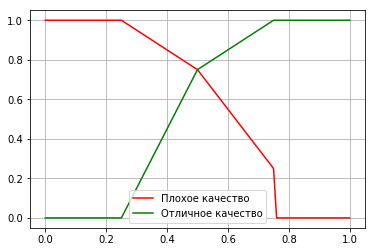

In [11]:
%matplotlib inline
x_q = [i*0.01 for i in range(0,101)]
fig1, bx = plt.subplots()
bx.plot(x_q,[bad_q(i) for i in x_q], label = "Плохое качество", color = "red")
bx.plot(x_q,[good_q(i) for i in x_q], label = "Отличное качество", color = "green")
bx.grid()
bx.legend()
fig1.show()

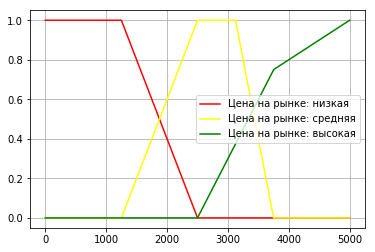

In [12]:
%matplotlib inline
x_sc = [i for i in range(0,5001)]
fig1, bx = plt.subplots()
bx.plot(x_sc,[low(i) for i in x_sc], label = "Цена на рынке: низкая", color = "red")
bx.plot(x_sc,[medium(i) for i in x_sc], label = "Цена на рынке: средняя", color = "yellow")
bx.plot(x_sc,[high(i) for i in x_sc], label = "Цена на рынке: высокая", color = "green")
bx.grid()
bx.legend()
fig1.show()

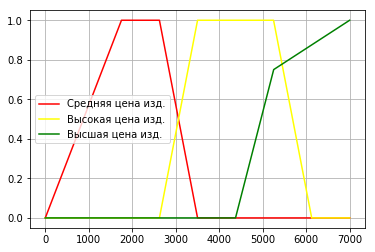

In [13]:
%matplotlib inline
x_res = [i for i in range(0,7001)]
fig1, bx = plt.subplots()
bx.plot(x_res,[medium_res(i) for i in x_res], label = "Средняя цена изд.", color = "red")
bx.plot(x_res,[high_res(i) for i in x_res], label = "Высокая цена изд.", color = "yellow")
bx.plot(x_res,[higgest_res(i) for i in x_res], label = "Высшая цена изд.", color = "green")
bx.grid()
bx.legend()
fig1.show()

In [14]:
def fuzzy_q(q):
    return bad_q(q), good_q(q)
def fuzzy_sc(sc):
    return low(sc), medium(sc), high(sc)
def defuzzy_res(res_x, res_y):
    mmax = max(res_y)
    num1 = res_y.index(mmax)
    res_y.reverse()
    num2 = res_y.index(mmax)
    res_y.reverse()
    res = (res_x[num1]+res_x[len(res_x)-num2-1])/2
    return res if mmax != 0 else 0
def rule(list_res_q, q):
    return [min(q,i) for i in list_res_q]

In [15]:
def system_fuzzy_conclusion(q, sc):
    fq_bad, fq_good = fuzzy_q(q)
    sc_l, sc_n, sc_h = fuzzy_sc(sc)
    x_res = [i for i in range(0,7001)]
    rule_1_q = rule([high_res(i) for i in x_res], fq_good)
    rule_2_q= rule([medium_res(i) for i in x_res], fq_bad)
    rule_3_sc = rule([higgest_res(i) for i in x_res], sc_h)
    rule_4_sc = rule([medium_res(i) for i in x_res], sc_l)
    rule_5_sc = rule([high_res(i) for i in x_res], sc_n)
    acc_q = [max(rule_1_q[i], rule_2_q[i]) for i in range(len(rule_1_q))]
    acc_sc = [max(rule_5_sc[i], rule_4_sc[i], rule_3_sc[i]) for i in range(len(rule_3_sc))]
    acc_res = [min(acc_q[i], acc_sc[i]) for i in range(len(acc_q))]
    return x_res, acc_res, defuzzy_res(x_res, acc_res)

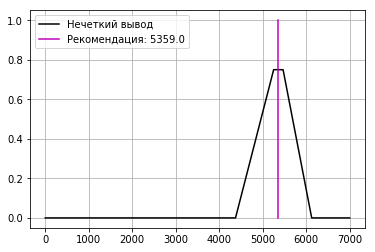

In [16]:
%matplotlib inline
x_res_ex_1, y_res_ex_1, res_ex_1 = system_fuzzy_conclusion(0.75, 3750)
fig1, bx = plt.subplots()
bx.plot(x_res_ex_1,y_res_ex_1, label = "Нечеткий вывод", color = "black")
bx.plot([res_ex_1,res_ex_1],[0,1], label = "Рекомендация: "+str(res_ex_1), color = "m")
bx.grid()
bx.legend()
fig1.show()

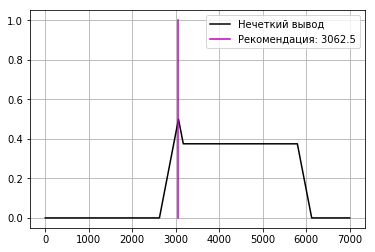

In [17]:
%matplotlib inline
x_res_ex_2, y_res_ex_2, res_ex_2 = system_fuzzy_conclusion(0.375, 2500)
fig1, bx = plt.subplots()
bx.plot(x_res_ex_2,y_res_ex_2, label = "Нечеткий вывод", color = "black")
bx.plot([res_ex_2,res_ex_2],[0,1], label = "Рекомендация: "+str(res_ex_2), color = "m")
bx.grid()
bx.legend()
fig1.show()

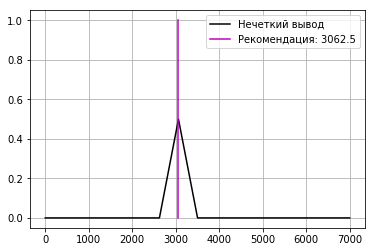

In [18]:
%matplotlib inline
x_res_ex_3, y_res_ex_3, res_ex_3 = system_fuzzy_conclusion(1, 1000)
fig1, bx = plt.subplots()
bx.plot(x_res_ex_3,y_res_ex_3, label = "Нечеткий вывод", color = "black")
bx.plot([res_ex_3,res_ex_3],[0,1], label = "Рекомендация: "+str(res_ex_3), color = "m")
bx.grid()
bx.legend()
fig1.show()

## Fuzzy clustering. FCM algorithm.

In [19]:
import numpy as np

class FCMmodel(object):
    def __init__(self, data, n, q = 2, eps_stop = 0.01, norma=None):
        self.data = data
        self.n = n
        self.q = q
        self.eps_stop = eps_stop
        self.eps_current = eps_stop*100
        self.matrix_fuzzy_mu = np.zeros((data.shape[0], n))
        self.matrix_fuzzy_mu_new = np.zeros((data.shape[0], n))
        self.cluster_centers = np.random.randint(np.min(data), np.max(data), (n, data.shape[1]))
        self.norma = norma
    def calculating_cluster_center(self):
        mu_matrix_T = (self.matrix_fuzzy_mu_new.copy().T)**self.q
        for centr in range(len(self.cluster_centers)):
            for axis in range(len(self.data[0])):
                self.cluster_centers[centr][axis] = np.sum(mu_matrix_T[centr]*self.data.T[axis])/np.sum(mu_matrix_T[centr])
    
    def calculating_new_mu_matrix(self):
        for point in range(len(self.data)):
            denominator = 0
            flag_eq = -1
            for cluster in range(self.n):
                if not np.array_equal(self.data[point], self.cluster_centers[cluster]):
                    difference_with_norm = (np.linalg.norm(self.data[point]-self.cluster_centers[cluster],self.norma))**(1/(self.q-1))
                    self.matrix_fuzzy_mu_new[point][cluster] = 1/difference_with_norm
                    denominator += 1/difference_with_norm
                else:
                    flag_eq = cluster
            self.matrix_fuzzy_mu_new[point] /= denominator
            if flag_eq != -1:
                self.matrix_fuzzy_mu_new[point] = np.zeros(n)
                self.matrix_fuzzy_mu_new[point][flag_eq] = 1
    def run(self):
        while self.eps_current >= self.eps_stop:
            self.matrix_fuzzy_mu = self.matrix_fuzzy_mu_new.copy()
            self.calculating_new_mu_matrix()
            self.calculating_cluster_center()
            self.eps_current = np.linalg.norm(self.matrix_fuzzy_mu_new - self.matrix_fuzzy_mu,self.norma)

In [20]:
data = np.array([[-56.0,3.0],
                [-48.0,6.0],
                [9.0,-220.0],
                [10.0,-370.0],
                [-60.0,-2.0]])
model = FCMmodel(data,2,q=1.5, eps_stop=0.00000001,norma = 2)
model.run()

In [21]:
 import pandas as pd
pd.DataFrame(model.matrix_fuzzy_mu_new)

,0,1
0,0.000262,0.999738
1,0.000768,0.999232
2,0.892482,0.107518
3,0.965269,0.034731
4,0.000538,0.999462


C:\WPy-3670\python-3.6.7\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


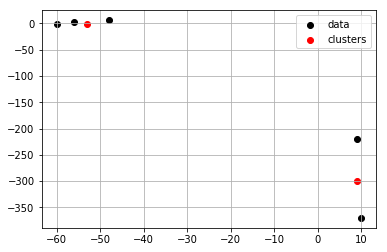

In [22]:
import matplotlib.pyplot as plt
fig1, bx = plt.subplots()
bx.scatter(model.data.T[0], model.data.T[1], color = "black", label = "data")
bx.scatter(model.cluster_centers.T[0], model.cluster_centers.T[1], color = "red", label = "clusters")
bx.grid()
bx.legend()
fig1.show()